In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [2]:
import sqlite3
conn = sqlite3.connect('../data/hist_prices.db')
c = conn.cursor()

In [3]:
data = pd.read_sql('''SELECT * FROM eos''', conn)
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,EOS,EOS,2017-07-02 23:59:59,2.87751,0.822648,0.996521,2.71005,320452000.0,0.000000e+00
1,2,EOS,EOS,2017-07-03 23:59:59,5.39597,2.632310,2.717390,4.08664,414950016.0,6.549307e+08
2,3,EOS,EOS,2017-07-04 23:59:59,4.19124,2.933450,4.098010,3.37200,218559008.0,5.501552e+08
3,4,EOS,EOS,2017-07-05 23:59:59,3.52350,2.730130,3.356000,3.00323,124339000.0,5.006264e+08
4,5,EOS,EOS,2017-07-06 23:59:59,3.86747,3.007830,3.014260,3.36133,177463008.0,5.683615e+08


In [4]:
# Add some more features derived from the exiting ones
data['Range'] = data.High - data.Low
data['Difference'] = data.Close - data.Open

In [5]:
data.drop(labels='SNo', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1466 entries, 0 to 1465
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        1466 non-null   object 
 1   Symbol      1466 non-null   object 
 2   Date        1466 non-null   object 
 3   High        1466 non-null   float64
 4   Low         1466 non-null   float64
 5   Open        1466 non-null   float64
 6   Close       1466 non-null   float64
 7   Volume      1466 non-null   float64
 8   Marketcap   1466 non-null   float64
 9   Range       1466 non-null   float64
 10  Difference  1466 non-null   float64
dtypes: float64(8), object(3)
memory usage: 126.1+ KB


In [6]:
#Converting Date column to Datetime
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1466 entries, 0 to 1465
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        1466 non-null   object        
 1   Symbol      1466 non-null   object        
 2   Date        1466 non-null   datetime64[ns]
 3   High        1466 non-null   float64       
 4   Low         1466 non-null   float64       
 5   Open        1466 non-null   float64       
 6   Close       1466 non-null   float64       
 7   Volume      1466 non-null   float64       
 8   Marketcap   1466 non-null   float64       
 9   Range       1466 non-null   float64       
 10  Difference  1466 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 126.1+ KB


In [8]:
data.describe()

,High,Low,Open,Close,Volume,Marketcap,Range,Difference
count,1466.000000,1466.000000,1466.000000,1466.000000,1.466000e+03,1.466000e+03,1466.000000,1466.000000
mean,4.839459,4.384314,4.623294,4.624088,1.888406e+09,3.941338e+09,0.455145,0.000794
std,3.355341,2.909707,3.145615,3.141473,1.774766e+09,2.585692e+09,0.646232,0.515313
min,0.518657,0.480196,0.492790,0.493225,4.556540e+06,0.000000e+00,0.017243,-4.212434
25%,2.694807,2.566841,2.631688,2.632416,6.850824e+08,2.436551e+09,0.115219,-0.093555
50%,3.734605,3.502376,3.617169,3.621721,1.590850e+09,3.323401e+09,0.232915,-0.001991
75%,5.955663,5.442724,5.745512,5.746104,2.517552e+09,4.975189e+09,0.508795,0.090754
max,22.890400,18.877399,21.639099,21.542601,2.032871e+10,1.776945e+10,5.626943,5.096298


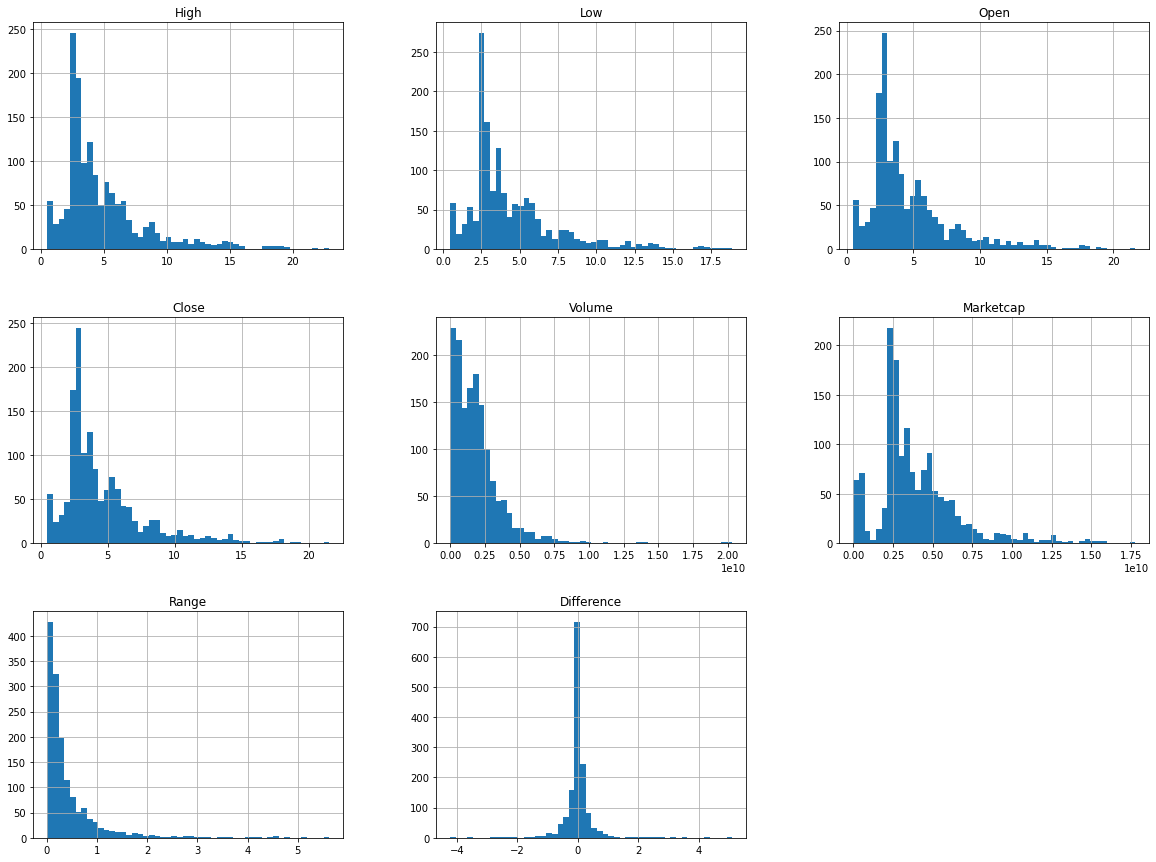

In [9]:
data[['High','Low','Open','Close','Volume','Marketcap','Range','Difference']].hist(bins=50, figsize = (20, 15))
plt.show();

In [10]:
#Days with the biggest price loss
data[['Date', 'Difference']].sort_values(by='Difference').head(10).T

,1410,302,1417,173,190,196,198,343,313,212
Date,2021-05-12 23:59:59,2018-04-30 23:59:59,2021-05-19 23:59:59,2017-12-22 23:59:59,2018-01-08 23:59:59,2018-01-14 23:59:59,2018-01-16 23:59:59,2018-06-10 23:59:59,2018-05-11 23:59:59,2018-01-30 23:59:59
Difference,-4.212434,-4.059,-3.585998,-2.8233,-2.81615,-2.732499,-2.6832,-2.657101,-2.555301,-2.4668


In [11]:
# Days with the biggest price gain
data[['Date', 'Difference']].sort_values(by='Difference', ascending=False).head(10).T

,1409,202,296,170,1404,301,283,1403,335,194
Date,2021-05-11 23:59:59,2018-01-20 23:59:59,2018-04-24 23:59:59,2017-12-19 23:59:59,2021-05-06 23:59:59,2018-04-29 23:59:59,2018-04-11 23:59:59,2021-05-05 23:59:59,2018-06-02 23:59:59,2018-01-12 23:59:59
Difference,5.096298,4.2647,3.5814,3.13761,2.695853,2.665201,2.49115,2.447128,2.4438,2.3468


In [12]:
fig = px.line(data, x='Date', y="Close")
fig.show();

In [13]:
fig = px.line(data, x='Date', y="Marketcap")
fig.show();

In [14]:
fig = px.line(data, x='Date', y="Difference")
fig.show();

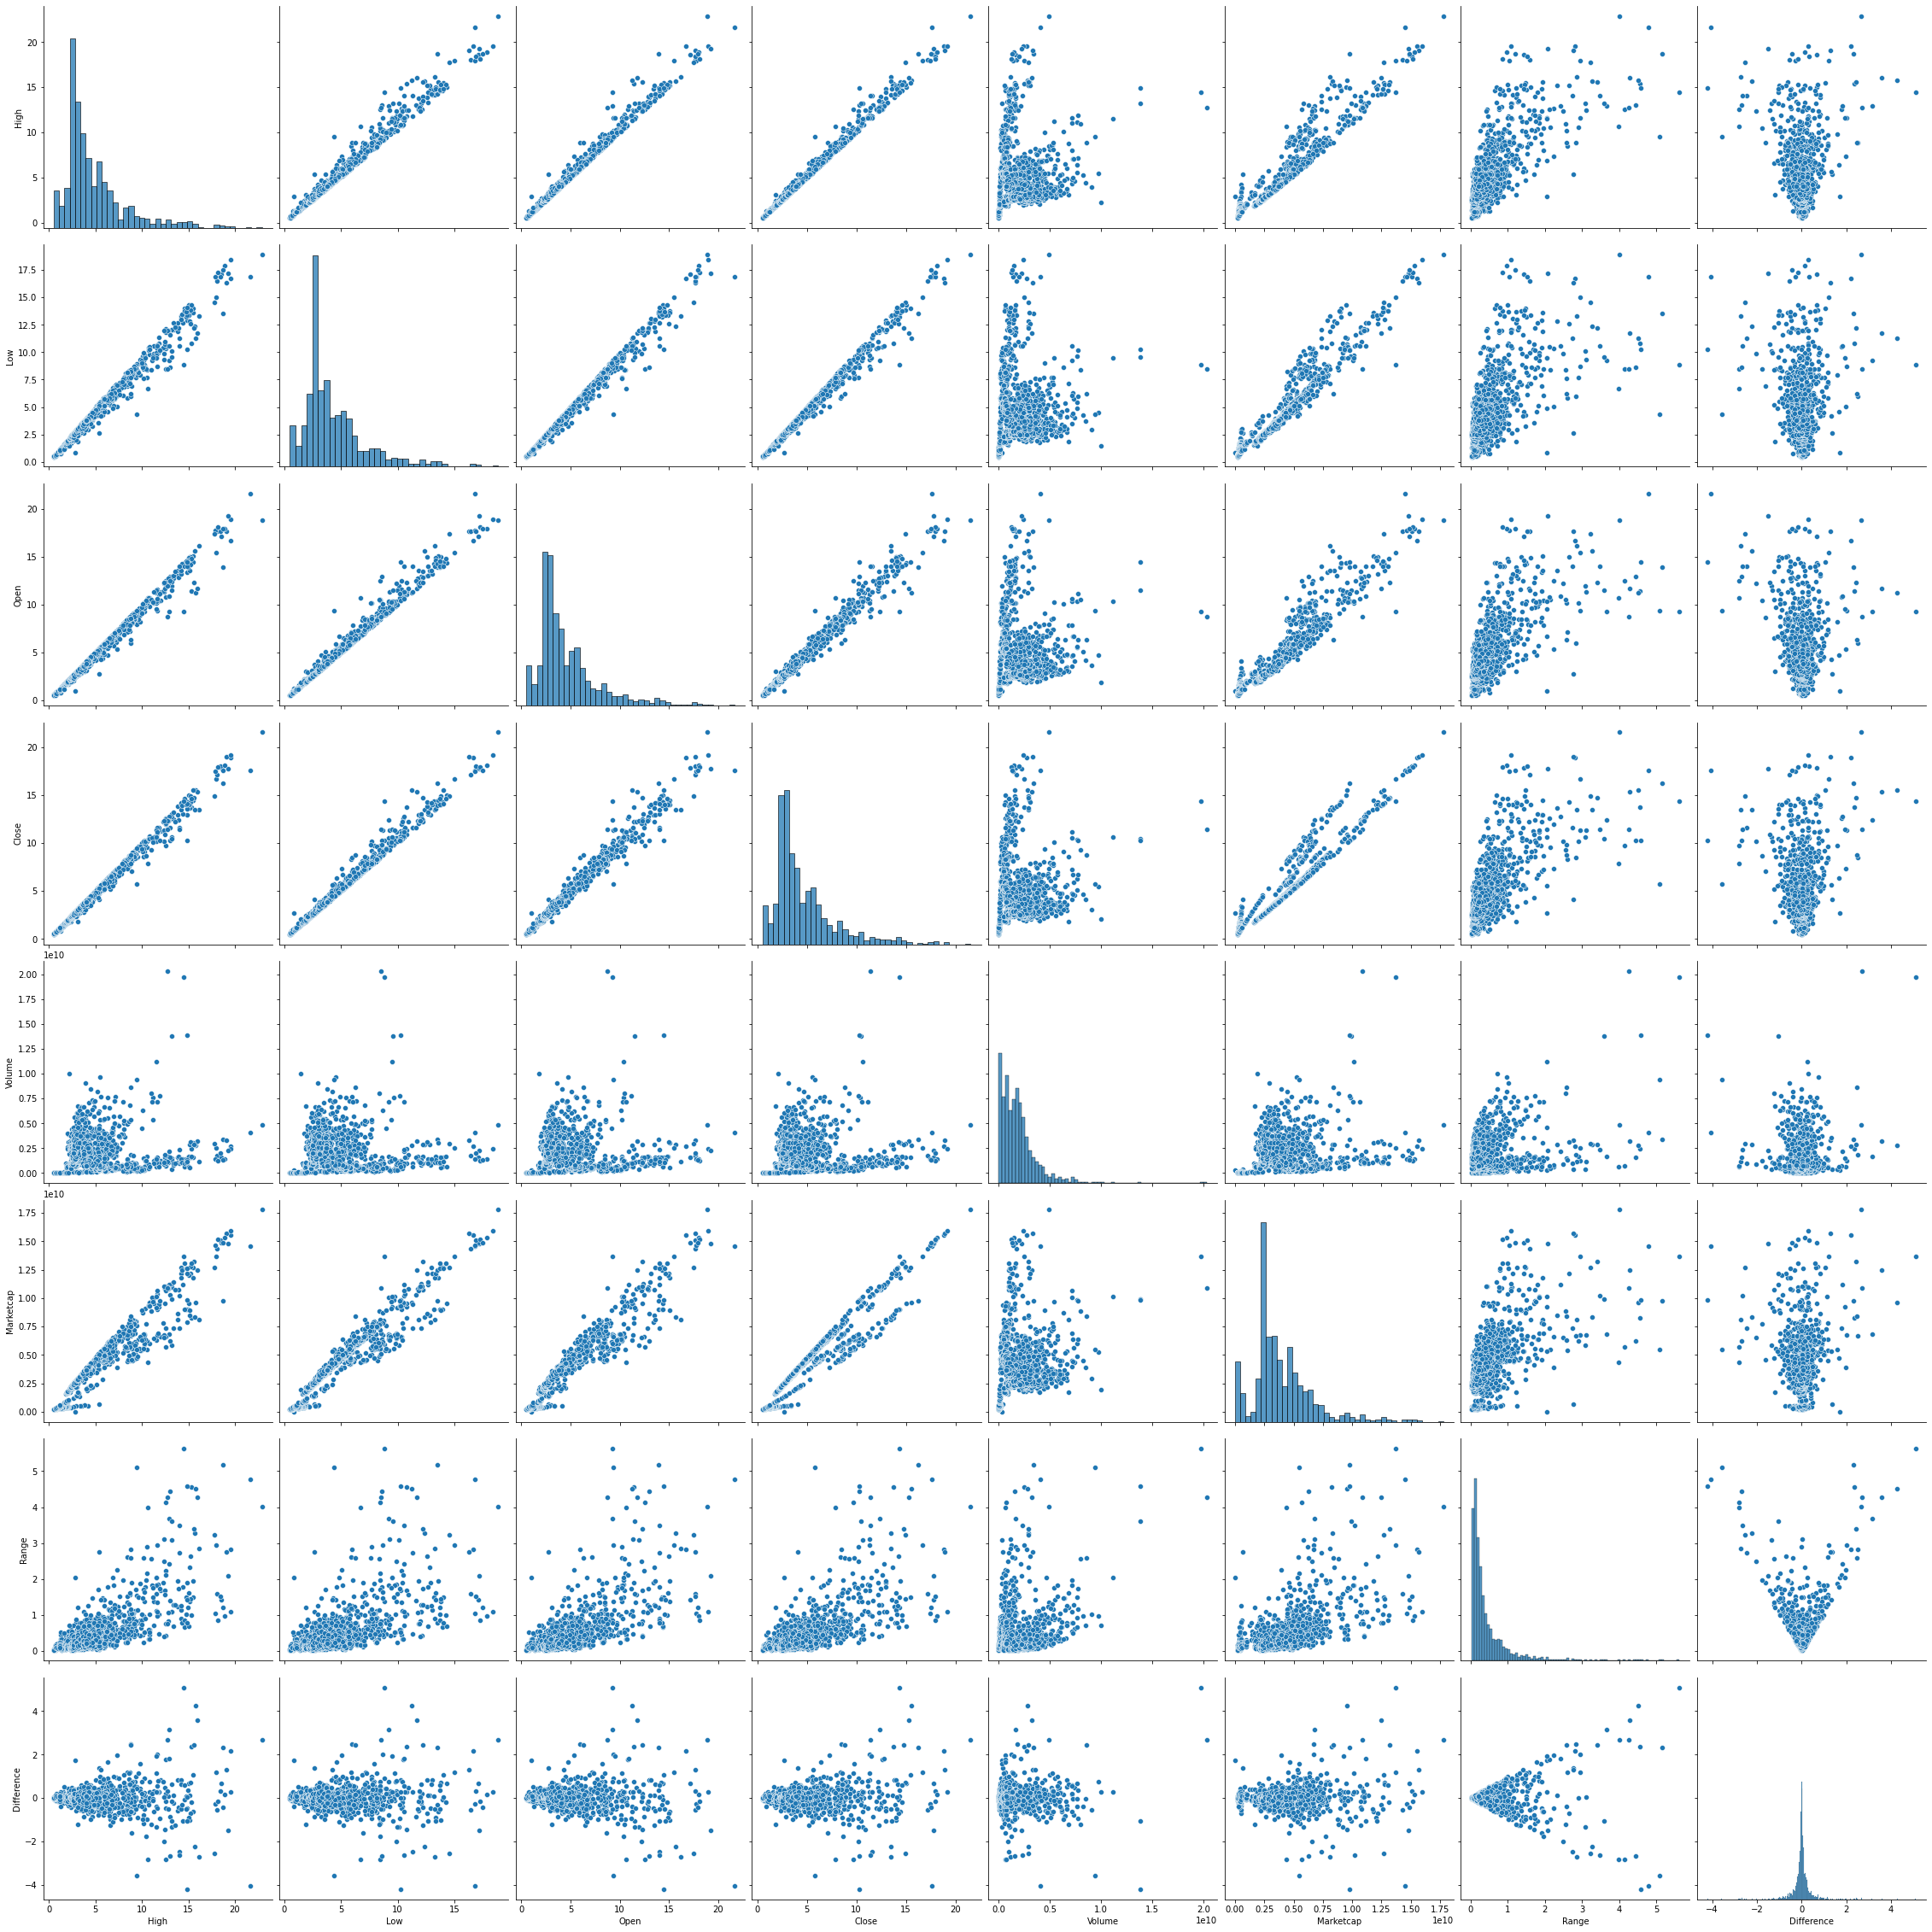

In [15]:
sns.pairplot(data,height=4);
